# Problem01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weights = pd.DataFrame()
cumulative_weights = pd.DataFrame()

In [3]:
def populateWeights(x, w, cw, Lambda):
    n = len(x)
    tw = 0
    for i in range(0, n):
        x[i] = i
        w[i] = (1 - Lambda) * Lambda**(n-i)
        tw += w[i]
        cw[i] = tw
    for i in range(0, n):
        w[i] = w[i]/tw
        cw[i] = cw[i]/tw

In [4]:
def weightsDataFrame(n, lambdaList):
    for Lambda in lambdaList:
        x = [0] * n
        w = [0] * n
        cw = [0] * n
        populateWeights(x, w, cw, Lambda)
        weights['λ=' + str(Lambda)] = w
        cumulative_weights['λ=' + str(Lambda)] = cw

In [5]:
weightsDataFrame(60, [0.1, 0.3, 0.5, 0.7, 0.9, 0.97])

In [6]:
dailyRtn = pd.read_csv('DailyReturn.csv').iloc[:,1:]

In [7]:
def weighted_CoV(i, j, Lambda):
    XminusX_mean = (dailyRtn.iloc[:,i] - dailyRtn.iloc[:,i].mean())
    YminusY_mean = (dailyRtn.iloc[:,j] - dailyRtn.iloc[:,j].mean())
    weight = weights['λ='+str(Lambda)]
    weighted_cov = (XminusX_mean * YminusY_mean * weight).sum()
    return weighted_cov

In [8]:
def EWCoV_matrix_df(Lambda):
    EWCoV_matrix = pd.DataFrame(index = dailyRtn.columns, columns = dailyRtn.columns)
    for i in range(0, 101):
        for j in range(0, 101):
            EWCoV_matrix.iloc[i,j] = weighted_CoV(i, j, Lambda)
    return EWCoV_matrix

In [9]:
def EWCoV_matrix(Lambda):
    EWCoV_matrix = np.arange(10201).reshape(101,101)
    for i in range(0, 101):
        for j in range(0, 101):
            EWCoV_matrix[i,j] = weighted_CoV(i, j, Lambda)
    return EWCoV_matrix

In [10]:
def PCA_Exp_Var(Lambda):
    plt.figure(figsize=(8,6), dpi=80)
    EWCoV_matrix = EWCoV_matrix_df(Lambda)
    EWCoV_matrix = np.float64(EWCoV_matrix.to_numpy())
    eigVals, eigVectors = np.linalg.eigh(EWCoV_matrix)
    total_eigVals = sum(eigVals)
    var_exp = [(i/total_eigVals) for i in sorted(eigVals, reverse=True)]
    cum_sum_exp = np.cumsum(var_exp)
    plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.title('λ=' + str(Lambda))
    plt.tight_layout()
    plt.show()

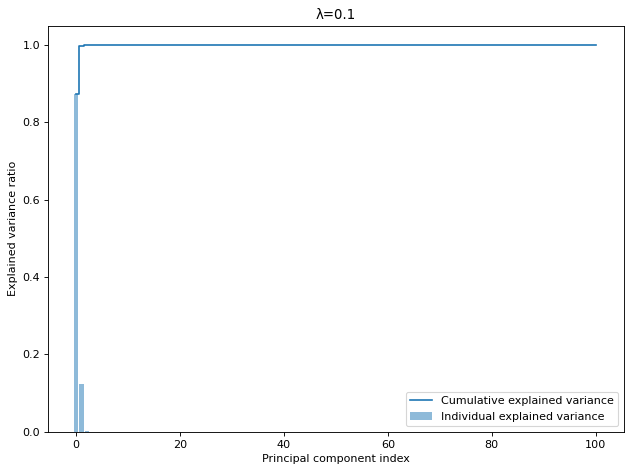

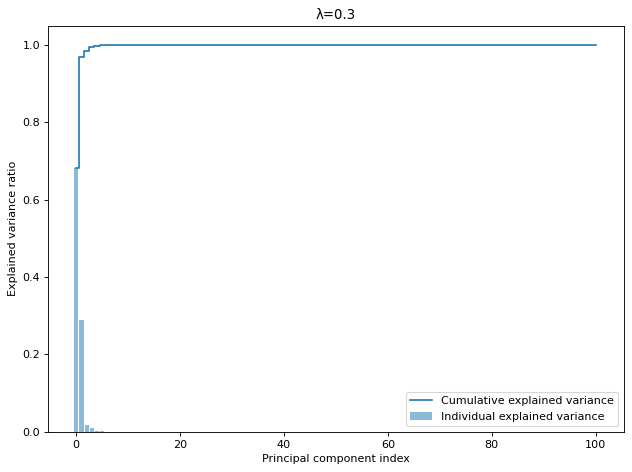

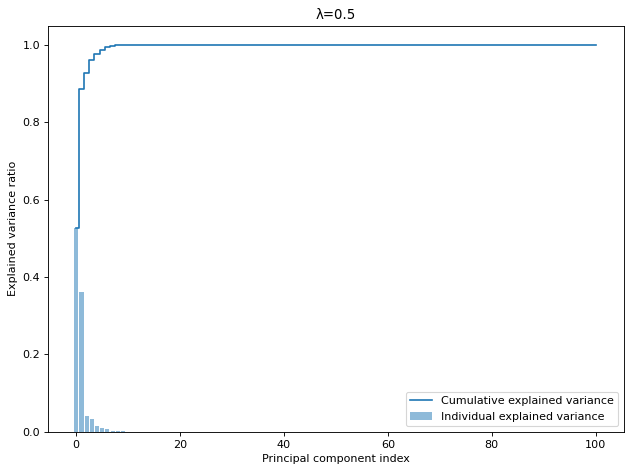

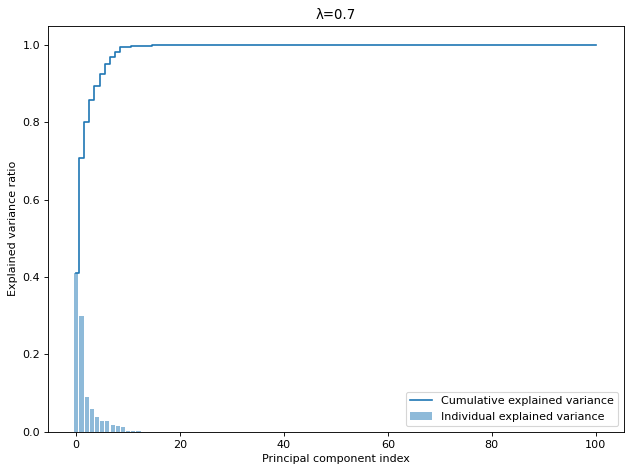

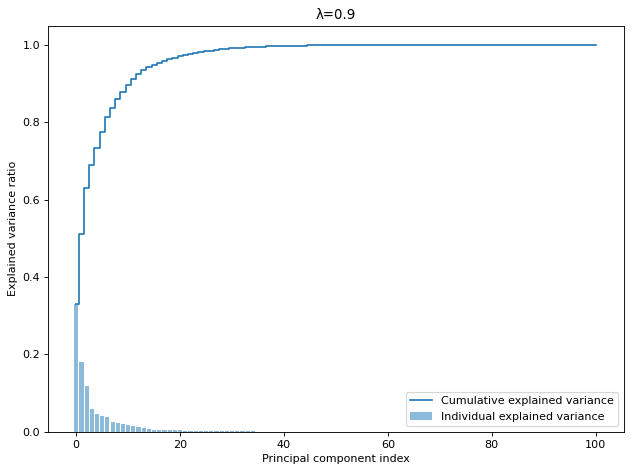

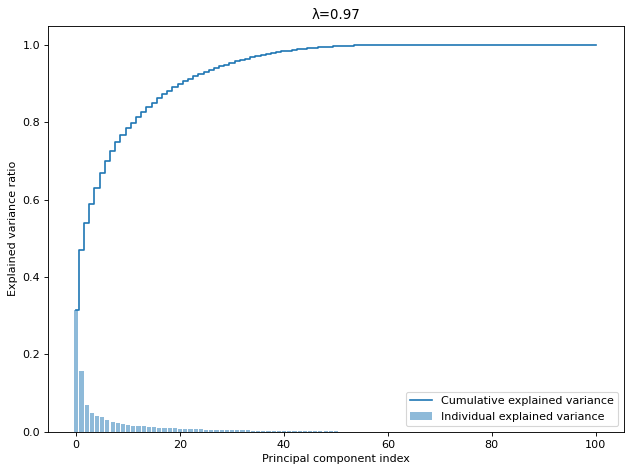

In [11]:
LambdaList = [0.1, 0.3, 0.5, 0.7, 0.9, 0.97]
for i in range(1, 7):
    Lambda = LambdaList[i-1]
    PCA_Exp_Var(Lambda)

# Problem02

## 2.1 Cholesky Factorization

In [22]:
# Cholesky that assumes PD matrix
def chol_psd(a):
    n = a.shape[1]
    #Initialize the root matrix with 0 values
    root = np.full(sigma.shape, 0.0, dtype='float64')

    #loop over columns
    for j in range(0, n):
        #if we are not on the first column, calculate the dot product of the preceeding row values.
        if (j > 0):
            s =  root[j,:j].T @ root[j,:j]
  
        #Diagonal Element
        root[j,j] =  np.sqrt(a[j,j] - s);

        ir = 1.0/root[j,j]
        #update off diagonal rows of the column
        for i in range((j+1), n):
            s = root[i,1:(j-1)].T @ root[j,1:(j-1)]
            root[i,j] = (a[i,j] - s) @ ir 

In [23]:
# test near_psd
n = 5
sigma = np.matrix(np.full((n, n), 0.9))
for i in range(n):
    sigma[i, i] = 1.0  
sigma[0, 1] = 1 
sigma[1, 0] = 1

res = chol_psd(sigma)
ans = np.array([[1.0,  0.0,  0.0,         0.0,         0.0],
                [1.0,  0.0,  0.0,         0.0,         0.0],
                [0.9,  0.0,  0.435889894, 0.0,         0.0],
                [0.9,  0.0,  0.20647416,  0.38388595,  0.0],
                [0.9,  0.0,  0.20647416,  0.123391911, 0.363514589]])
abs(res - ans).sum() < 1e-8

UnboundLocalError: local variable 's' referenced before assignment